<a href="https://colab.research.google.com/github/asif-tech/Data-analysis-Projects/blob/main/TransactionData%20DQA%20and%20Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date

In [3]:
cust_demo=pd.read_excel("/content/Raw_data.xlsx", sheet_name='Transactions')

In [5]:
cust_demo.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [18]:
cust_demo.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [8]:
cust_demo.isnull().mean()*100

transaction_id             0.000
product_id                 0.000
customer_id                0.000
transaction_date           0.000
online_order               1.800
order_status               0.000
brand                      0.985
product_line               0.985
product_class              0.985
product_size               0.985
list_price                 0.000
standard_cost              0.985
product_first_sold_date    0.985
dtype: float64

In [10]:
cust_demo[cust_demo['brand'].isnull()][['product_line','product_class','product_size','standard_cost','product_first_sold_date']].isnull().sum()

product_line               197
product_class              197
product_size               197
standard_cost              197
product_first_sold_date    197
dtype: int64

In [11]:
dob_index_drop=cust_demo[cust_demo['brand'].isnull()].index
dob_index_drop

Index([  136,   159,   366,   406,   676,   780,  1003,  1130,  1196,  1282,
       ...
       19045, 19132, 19176, 19196, 19205, 19340, 19383, 19793, 19859, 19871],
      dtype='int64', length=197)

In [12]:
cust_demo.drop(index = dob_index_drop,inplace=True,axis=0)

In [13]:
cust_demo['brand'].isnull().sum()

0

In [16]:
val=cust_demo['online_order'].mode()


0    1.0
Name: online_order, dtype: float64


In [17]:
cust_demo['online_order'].fillna(1,inplace=True,axis=0)

In [19]:
cust_demo['Profit']=cust_demo['list_price']-cust_demo['standard_cost']

In [20]:
cust_demo.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
Profit                     0
dtype: int64

<Figure size 2000x800 with 0 Axes>

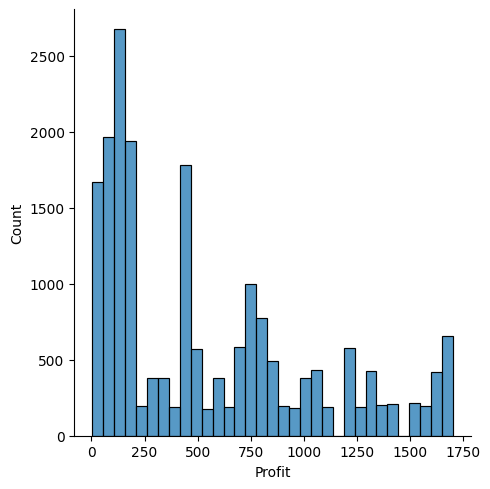

In [22]:
plt.figure(figsize=(20,8))
sns.displot(cust_demo['Profit'])

In [23]:
cust_demo['Profit'].describe()

count    19803.000000
mean       551.950915
std        493.412849
min          4.800000
25%        133.780000
50%        445.210000
75%        830.240000
max       1702.550000
Name: Profit, dtype: float64

In [24]:
cust_demo_dupped = cust_demo.drop('transaction_id',axis=1)
print("total number of rows(records) after removing customer_id(pk) from dataset {}".format(cust_demo_dupped.shape[0]))
print("total number of rows(records) before removing customer_id(pk) from dataset {}".format(cust_demo.shape[0]))

total number of rows(records) after removing customer_id(pk) from dataset 19803
total number of rows(records) before removing customer_id(pk) from dataset 19803


In [25]:
cust_demo.to_csv('Transaction_Cleaned.csv', index=False)